<a href="https://colab.research.google.com/github/LucianoBV/Procesamiento-del-habla/blob/main/TEMA_2_CLASIFICACI%C3%93N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROCESAMIENTO DEL HABLA**
# DESAFÍO OBLIGATORIO FINAL MARTÍN FIERRO
**DOCENTE:** Ingeniera en Sistemas de Información Ana Laura Diedrichs

**ALUMNO:** Vargas Luciano Benjamín



# PRESENTACION DEL DATA SET
Para este proyecto vamos a utilizar los libros gauchescos EL Martín Fierro y Fausto (de Estanislao Lopez).


### Descargamos los archivos desde la url

In [1]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.4 MB/s eta 0:00:00


In [2]:
import requests
import os
import pdfplumber

In [3]:
#creo la variable url
url = "https://www.argentina.gob.ar/sites/default/files/hernandez_jose_-_el_gaucho_martin_fierro.pdf"

#hago el get y guardo la respuesta
response = requests.get(url)

#si la respuesta es ok, abro el archivo, descargo los datos y con eso escribo el archivo
if response.status_code == 200:
  Martin = "el_gaucho_martin_fierro.pdf"
  with open(Martin, "wb") as file:
    file.write(response.content)
#imprimo el peso para verificar que se haya descargado correctamente
  file_size = os.path.getsize(Martin)
  print(f"PDF descargado exitosamente, tamaño del archivo: {file_size} bytes")
else:
#veo cual es el código de estado del response si la respuesta no fue 200
  print(f"Error al descargar el PDF. Código de estado: {response.status_code}")

PDF descargado exitosamente, tamaño del archivo: 513796 bytes


In [4]:
#creo la variable url
url = "https://www.gba.gob.ar/sites/default/files/cultura/archivos/FAUSTO-Estanislado_del_Campo.pdf"

#hago el get y guardo la respuesta
response = requests.get(url)

#si la respuesta es ok, abro el archivo, descargo los datos y con eso escribo el archivo
if response.status_code == 200:
  Fausto = "FAUSTO-Estanislado_del_Campo.pdf"
  with open(Fausto, "wb") as file:
    file.write(response.content)
#imprimo el peso para verificar que se haya descargado correctamente
  file_size = os.path.getsize(Fausto)
  print(f"PDF descargado exitosamente, tamaño del archivo: {file_size} bytes")
else:
#veo cual es el código de estado del response si la respuesta no fue 200
  print(f"Error al descargar el PDF. Código de estado: {response.status_code}")

PDF descargado exitosamente, tamaño del archivo: 157971 bytes


# PREPROCESAMIENTO DE LOS TEXTOS

### Función para verificar cada página del libro y excluirla si no es texto específico del libro

In [5]:
def pagina_a_procesar(texto_pagina):
    # Palabras clave para omitir ciertas secciones como índice, prólogo, anexos, etc.
    palabras_omitir = ['Índice', 'Prólogo', 'Anexo', 'Imágenes', 'Agradecimientos', 'Dedicatoria', 'http',]

    # Revisar si la página contiene alguna palabra que indique que se excluirá
    for palabra in palabras_omitir:
        if palabra.lower() in texto_pagina.lower():
            return False
    return True

# Función para extraer el texto importante del PDF
def extraer_texto(filename):
    texto_relevante = ''

    with pdfplumber.open(filename) as pdf:
        pagina_inicio=0
        pagina_fin=len(pdf.pages)
        # Iterar sobre las páginas en el rango seleccionado
        for pagina_numero in range(pagina_inicio, pagina_fin):
            pagina = pdf.pages[pagina_numero]
            texto_pagina = pagina.extract_text()

            # Si la página no tiene texto o es irrelevante, omitirla
            if texto_pagina and pagina_a_procesar(texto_pagina):
                texto_relevante += texto_pagina + '\n'

    return texto_relevante

 # Extraer el texto relevante del rango de páginas
Martin_Fierro = extraer_texto(Martin)
Fausto_Estanislao = extraer_texto(Fausto)


In [6]:
# Mostrar el texto extraído
print("Texto relevante extraído:")
print(Martin_Fierro)

Texto relevante extraído:
El gaucho
Martín Fierro
José Hernández
Recursos de dominio público
El Gaucho Martín Fierro
I
Aquí me pongo a cantar
al compás de la vigüela,
que el hombre que lo desvela
una pena estrordinaria,
como la ave solitaria
con el cantar se consuela.
Pido a los santos del cielo
que ayuden mi pensamiento:
les pido en este momento
que voy a cantar mi historia
me refresquen la memoria
y aclaren mi entendimiento.
Vengan santos milagrosos,
vengan todos en mi ayuda,
que la lengua se me añuda
y se me turba la vista;
pido a mi Dios que me asista
en una ocasión tan ruda.
Yo he visto muchos cantores,
con famas bien otenidas
y que después de alquiridas
no las quieren sustentar:
parece que sin largar
se cansaron en partidas.
Mas ande otro criollo pasa
Martín Fierro ha de pasar;
nada lo hace recular,
ni las fantasmas lo espantan,
y dende que todos cantan
yo también quiero cantar.
Cantando me he de morir,
cantando me han de enterrar,
y cantando he de llegar
al pie del Eterno Padre;

In [7]:
# Mostrar el texto extraído
print("Texto relevante extraído:")
print(Fausto_Estanislao)

Texto relevante extraído:
FAUSTO
Impresiones del gaucho Anastasio el Pollo en la
representación de esta opera
ESTANISLAO DEL CAMPO
Al poeta Ricardo Gutierrez
Diálogo entre dos gauchos, Anastasio y don Laguna, donde se intercambian impresiones
sobre la ópera Fausto, vista en el teatro Colón. Preciosa pieza humorística que mereció
elogios de José Hernández, Jorge Luis Borges y Mujica Laínez, entre otros.
Carta de Juan Carlos Gómez
Del Campo:
Las buenas obras son siempre hijas de los bellos sentimientos, porque las mejores
y mas grandes ideas nacen en el corazon, llevando consigo la emocion de que
nacieron.
Su pobreza de poeta, empeñada en aliviar dolorosos infortunios, ha apelado á
esa infaligable alquimista de la imajinacion, que elabora los sueños de oro y fabrica
los palacios en el aire, y ella, evocándole al Demonio, ha tenido el poder de
ponerlo al servicio de la santa accion con algo digno de la elevacion del propósito.
No es otra la idea jeneratriz del poema monumental de los alem

### Función para dividir el texto en estrofas, las limpia y nos devuelve una lista estructurada que representa el corpus del poema.

In [8]:
# Importamos el  módulo re, que proporciona soporte para expresiones regulares para la búsqueda de patrones dentro del texto.
import re

def crear_corpus(texto):
    # Reemplazar puntos finales y signos de exclamación por doble espacio para separar estrofas
    texto_modificado = re.sub(r'([.!])', r'\1  ', texto)

    # Dividir el texto en estrofas usando doble espacio como delimitador
    estrofas = texto_modificado.split('  ')

    # Limpiar estrofas vacías y eliminar espacios adicionales
    estrofas = [estrofa.strip() for estrofa in estrofas if estrofa.strip()]

    return estrofas

In [9]:
# Crear el corpus de documentos
corpus_documentos_Martin = crear_corpus(Martin_Fierro)
corpus_documentos_Fausto = crear_corpus(Fausto_Estanislao)

In [10]:
cantidad_estrofas = len(corpus_documentos_Martin)
print(f"El corpus 'corpus_documentos_Martin' contiene {cantidad_estrofas} estrofas del Martín Fierro.")

El corpus 'corpus_documentos_Martin' contiene 650 estrofas del Martín Fierro.


In [11]:
cantidad_estrofas = len(corpus_documentos_Fausto)
print(f"El corpus 'corpus_documentos_Fausto' contiene {cantidad_estrofas} estrofas del Fausto.")

El corpus 'corpus_documentos_Fausto' contiene 942 estrofas del Fausto.


In [12]:
# Imprimir el corpus para verificar los resultados
for idx, documento in enumerate(corpus_documentos_Martin):
    print(f"Documento {idx+1}: {documento}")

Documento 1: El gaucho
Martín Fierro
José Hernández
Recursos de dominio público
El Gaucho Martín Fierro
I
Aquí me pongo a cantar
al compás de la vigüela,
que el hombre que lo desvela
una pena estrordinaria,
como la ave solitaria
con el cantar se consuela.
Documento 2: Pido a los santos del cielo
que ayuden mi pensamiento:
les pido en este momento
que voy a cantar mi historia
me refresquen la memoria
y aclaren mi entendimiento.
Documento 3: Vengan santos milagrosos,
vengan todos en mi ayuda,
que la lengua se me añuda
y se me turba la vista;
pido a mi Dios que me asista
en una ocasión tan ruda.
Documento 4: Yo he visto muchos cantores,
con famas bien otenidas
y que después de alquiridas
no las quieren sustentar:
parece que sin largar
se cansaron en partidas.
Documento 5: Mas ande otro criollo pasa
Martín Fierro ha de pasar;
nada lo hace recular,
ni las fantasmas lo espantan,
y dende que todos cantan
yo también quiero cantar.
Documento 6: Cantando me he de morir,
cantando me han de enterr

In [13]:
# Imprimir el corpus para verificar los resultados
for idx, documento in enumerate(corpus_documentos_Fausto):
    print(f"Documento {idx+1}: {documento}")

Documento 1: FAUSTO
Impresiones del gaucho Anastasio el Pollo en la
representación de esta opera
ESTANISLAO DEL CAMPO
Al poeta Ricardo Gutierrez
Diálogo entre dos gauchos, Anastasio y don Laguna, donde se intercambian impresiones
sobre la ópera Fausto, vista en el teatro Colón.
Documento 2: Preciosa pieza humorística que mereció
elogios de José Hernández, Jorge Luis Borges y Mujica Laínez, entre otros.
Documento 3: Carta de Juan Carlos Gómez
Del Campo:
Las buenas obras son siempre hijas de los bellos sentimientos, porque las mejores
y mas grandes ideas nacen en el corazon, llevando consigo la emocion de que
nacieron.
Documento 4: Su pobreza de poeta, empeñada en aliviar dolorosos infortunios, ha apelado á
esa infaligable alquimista de la imajinacion, que elabora los sueños de oro y fabrica
los palacios en el aire, y ella, evocándole al Demonio, ha tenido el poder de
ponerlo al servicio de la santa accion con algo digno de la elevacion del propósito.
Documento 5: No es otra la idea jene

# TEMA 2 CLASIFICACIÓN
Determinar si un verso (o estrofa) es del Martín Fierro o del Fausto (Estanislao Lopez).

### Etiquetamos el corpus del Martin fierro y de Fausto

In [14]:
# Crear etiquetas
etiquetas_martin_fierro = ['Martin Fierro'] * len(corpus_documentos_Martin)
etiquetas_fausto = ['Fausto'] * len(corpus_documentos_Fausto)

In [15]:
# Combinar datos y etiquetas
todos_los_versos = corpus_documentos_Martin + corpus_documentos_Fausto
todas_las_etiquetas = etiquetas_martin_fierro + etiquetas_fausto

### Dividimos en entrenamiento y testeo. Luego vectorizamos usando Tf-Idf.

In [16]:
from sklearn.model_selection import train_test_split
# El 20% de los datos se utilizará para pruebas y el 80% restante para entrenamiento.
versos_entrenamiento, versos_prueba, etiquetas_entrenamiento, etiquetas_prueba = train_test_split(
    todos_los_versos, todas_las_etiquetas, test_size=0.2, random_state=42)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Utilizamos la vectorización TF-IDF para convertir los datos de texto en un formato numérico adecuado para el algoritmo.
vectorizador = TfidfVectorizer()
vectores_entrenamiento = vectorizador.fit_transform(versos_entrenamiento)
vectores_prueba = vectorizador.transform(versos_prueba)

### Creamos un clasificador Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB
# Es adecuado para tareas de clasificación de texto.
clasificador = MultinomialNB()
clasificador.fit(vectores_entrenamiento, etiquetas_entrenamiento)

MultinomialNB()

### Aplicamos el clasificador a los vectores de prueba y constatamos con la métrica f1 score.

In [19]:
# Aplicar el clasificador a los vectores de prueba
predicciones = clasificador.predict(vectores_prueba)

# Mostrar las predicciones
print("Predicciones:")
for i, prediccion in enumerate(predicciones):
    print(f"Verso {i+1}: {versos_prueba[i]} - Predicción: {prediccion}")

Predicciones:
Verso 1: »
Quizá tienen razon; gentes de letras conozco yo que lo confiesan sotto voce. - Predicción: Fausto
Verso 2: El Diablo entonces mandó
A la rubia que se juese,
Y que le paré se uniese,
Y la cortina cayó. - Predicción: Fausto
Verso 3: —¡Lindo el mozo! - Predicción: Fausto
Verso 4: Y aguante el que no se anime
a meterse en tanto engorro,
o si no aprétesé el gorro
o para otra tierra emigre;
pero yo ando como el tigre
que le roban los cachorros. - Predicción: Fausto
Verso 5: —Talvez lo traiba templao
Por echarla de baquiano . - Predicción: Fausto
Verso 6: Allí un gringo con un órgano
y una mona que bailaba
haciéndonos ráir estaba
cuando le tocó el arreo. - Predicción: Fausto
Verso 7: —¿Sabe que el Diablo, canejo,
La conoce á la mujer?
—Cuando la rubia gastaba
Tanto mirarse, la luna,
Se apareció Don Laguna,
La vieja que la cuidaba. - Predicción: Fausto
Verso 8: Ya no he de probar fortuna
con carta tan conocida:
mujer y perra parida,
no se me acerca ninguna. - Predicció

In [20]:
from sklearn.metrics import f1_score

# Calcular el F1-score
f1 = f1_score(etiquetas_prueba, predicciones, average='weighted')

# Imprimir el F1-score
print(f"F1-score: {f1}")

F1-score: 0.8156861902434045


### Costatamos resultados con un matriz de confución.

La matriz de confusión es una herramienta que nos ayuda a visualizar el rendimiento de un modelo de clasificación, en este caso clasificar versos del Martín Fierro y Fausto.

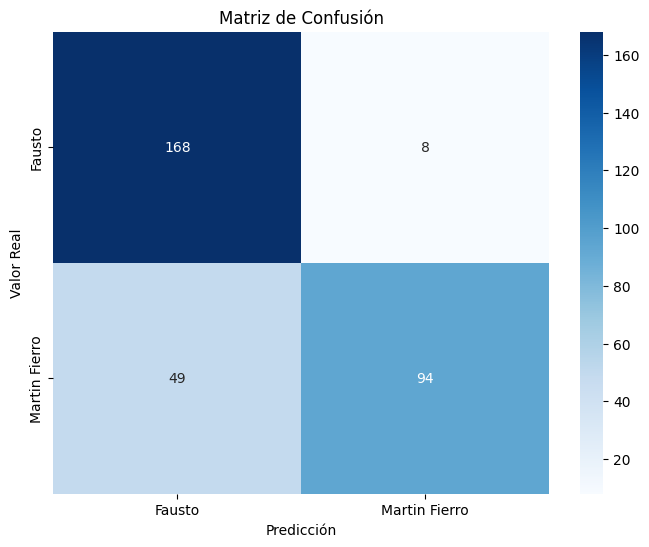

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'etiquetas_reales' contains the true labels for the test data
# and 'predicciones' contains the model's predictions
matriz_confusion = confusion_matrix(etiquetas_prueba, predicciones)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Fausto", "Martin Fierro"],
            yticklabels=["Fausto", "Martin Fierro"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

Esto significa:

168 versos del Fausto fueron clasificados correctamente como del Fausto.

94 versos del Martín Fierro fueron clasificados correctamente como del Martín Fierro.

8 versos del Fausto fueron clasificados incorrectamente como del Martín Fierro.

49 versos del Martín Fierro fueron clasificados incorrectamente como del Fausto.

### Creamos una función para clasificar aleatoreamente unas estrofas.

In [22]:
import random
from sklearn.metrics import accuracy_score, classification_report

In [23]:
# Función para clasificar una estrofa con MultinomialNB
def clasificar_estrofa_NB(estrofa, clasificador, vectorizador):

  vector_estrofa = vectorizador.transform([estrofa])
  etiqueta_predicha = clasificador.predict(vector_estrofa)[0]
  return etiqueta_predicha

In [24]:
# Selecciona aleatoriamente algunas estrofas para la prueba
num_estrofas_prueba = 20  # Ajusta este número
estrofas_prueba = random.sample(todos_los_versos, num_estrofas_prueba)# lista que contiene todos los versos de Martin Fierro y Fausto.
# El resultado, los versos seleccionados aleatoriamente, se almacena en la variable estrofas_prueba.
etiquetas_reales = [todas_las_etiquetas[todos_los_versos.index(estrofa)] for estrofa in estrofas_prueba]
# La lista resultante de etiquetas correctas se almacena en la variable etiquetas_reales.

In [28]:
# Clasifica las estrofas de prueba con MultinomialNB
etiquetas_predichas_NB = [clasificar_estrofa_NB(estrofa, clasificador, vectorizador) for estrofa in estrofas_prueba]


In [26]:
# Calcula la precisión
precision = accuracy_score(etiquetas_reales, etiquetas_predichas_NB)

In [27]:
# Imprime los resultados
print("Estrofas de prueba y clasificaciones con MultinomialNB:")
for i, estrofa in enumerate(estrofas_prueba):
  print(f"Estrofa {i + 1}: {estrofa}")
  print(f"Etiqueta real: {etiquetas_reales[i]}, Etiqueta predicha: {etiquetas_predichas_NB[i]}")

print(f"\nPrecisión del modelo: {precision:.4f}")

# Imprime el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(etiquetas_reales, etiquetas_predichas_NB))

Estrofas de prueba y clasificaciones con MultinomialNB:
Estrofa 1: No bien esto el Diablo oyó,
Soltó una risa tan fiera,
Que toda la noche entera
En mis oreias sonó.
Etiqueta real: Fausto, Etiqueta predicha: Fausto
Estrofa 2: Ya las estrellas brillantes
Una por una salían,
Y los montes parecíarn
Batallones de gigantes.
Etiqueta real: Fausto, Etiqueta predicha: Fausto
Estrofa 3: .
Etiqueta real: Martin Fierro, Etiqueta predicha: Fausto
Estrofa 4: ¡Tal vez no falte una china
que se apiade de nosotros!
Etiqueta real: Martin Fierro, Etiqueta predicha: Martin Fierro
Estrofa 5: Y haciendo un estraño ruido
En las hojas trompezaban,
Los pájaros que volaban
A guarecerse en su nido.
Etiqueta real: Fausto, Etiqueta predicha: Fausto
Estrofa 6: .
Etiqueta real: Martin Fierro, Etiqueta predicha: Fausto
Estrofa 7: Página 50
En este punto el cantor
buscó un porrón pa consuelo,
echó un trago como un cielo,
dando fin a su argumento,
y de un golpe al istrumento
lo hizo astillas contra el suelo.
Etiqueta 